# Exploration 15 
---
## 문자를 읽을 수 있는 딥러닝

In [12]:
import os
import pytesseract
from PIL import Image
import numpy as np
import cv2
from pytesseract import Output
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data_path = os.getenv('HOME')+ '/aiffel/ocr_python/test_image'
data_path

'/aiffel/aiffel/ocr_python/test_image'

In [10]:
data_list = os.listdir(img_path)
img_file_path = [data_path+'/'+name for name in data_list]
img_file_path = sorted(img_file_path)
img_file_path

['/aiffel/aiffel/ocr_python/test_image/.ipynb_checkpoints',
 '/aiffel/aiffel/ocr_python/test_image/test_image01.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image02.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image03.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image04.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image05.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image06.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image07.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image08.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image09.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image10.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image11.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image12.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image13.png']

In [18]:
image_pil = []
image = []
for i in range(1,13+1):
    image_pil.append(Image.open(img_file_path[i]))
    image.append(np.array(image_pil[i-1]))


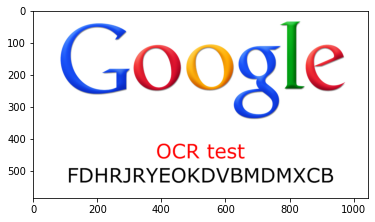

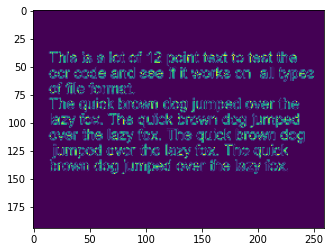

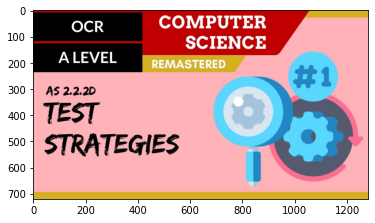

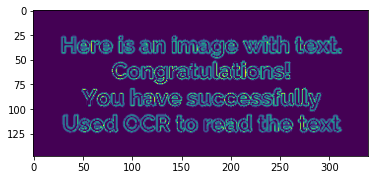

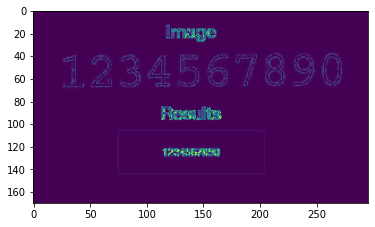

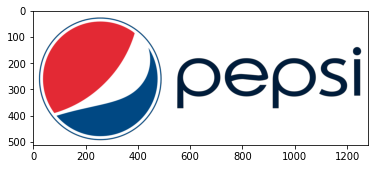

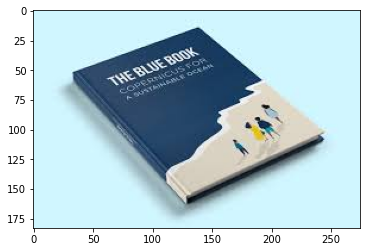

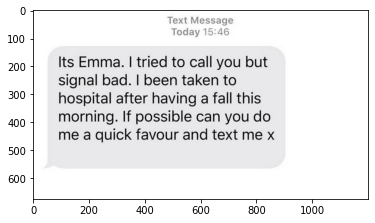

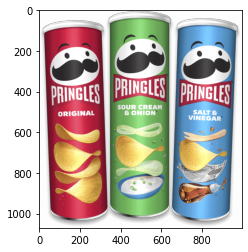

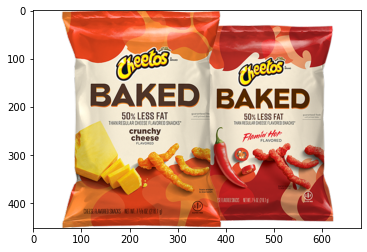

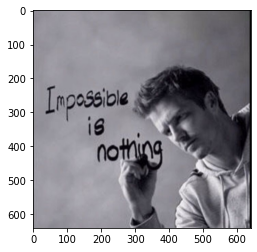

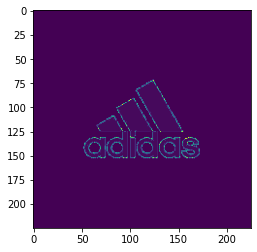

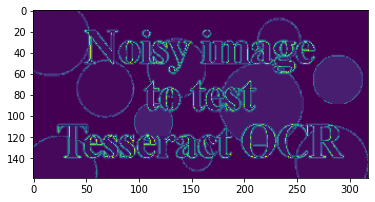

In [30]:
for i in range(13):
    plt.imshow(image[i])
    plt.show()

## (1) keras - ocr

In [3]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [49]:
img_file_path[1:]

['/aiffel/aiffel/ocr_python/test_image/test_image01.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image02.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image03.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image04.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image05.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image06.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image07.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image08.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image09.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image10.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image11.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image12.png',
 '/aiffel/aiffel/ocr_python/test_image/test_image13.png']

In [53]:
images = [ keras_ocr.tools.read(path) for path in img_file_path[1:]]
prediction_groups = [pipeline.recognize([path]) for path in img_file_path[1:]]

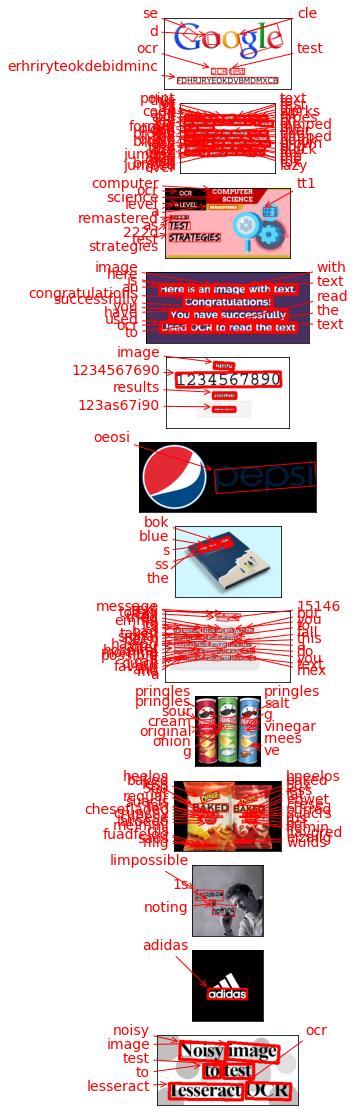

In [54]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## (2) Tesseract

In [56]:
# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [57]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [61]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python' # img_file_path 를 앞에서 선언하였기에 사실상 의미는 없다.

for i in range(1,13+1):
    print('[{}]'.format(i))
    print('========================================================')
    cropped_image_path_list = crop_word_regions(img_file_path[i], work_dir)
    print('========================================================')
    recognize_images(cropped_image_path_list)

[1]
/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
Google

OCR

CEST

FDHRIRYEOKDVBMDMXCB

Done
[2]
/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.pn

# 회고

## 1. 모델에 대한 평가

이번 프로젝트는 OCR 프로그램을 설계하는 프로젝트로, keras-ocr, Tesseract 를 이용하여 모델을 설계하였다.<br> (_이미지 파일 경로를 설정하는데 많이 애를 먹어 Google Ocr API의 성능에 대해서는 시험하지 못하였다.._)

<br>

텍스트가 __주__ 가 되는 이미지와 여러 정보 안에 텍스트가 있는 경우를 나누어서 총 13가지의 사진을 비교하였는데 문자가 기울어져있거나, 폰트가 유니크한 경우(pepsi 와 같이) keras-ocr 은 인식은 하였으나 잘못 읽은 경우가 많았고 Tesseract의 경우 아예 이미지 내에서 텍스트가 없다고 판단하는 경우도 있었다. 두 모델 모두 흰바탕에 텍스트 밖에 없는 이미지에 대해서도 정확하게 인식하지 못하는 경우가 많았다. 또한 keras-ocr의 경우 Tessearact에 비해서 텍스트를 잘 검출하는 것 같았지만, 첫번째 이미지의 __Google__ 의 경우 __G__ 가 다른 문자에 비하여 커서 생긴 문제인지 띄어쓰기를 제대로 인식하지 못하는 것 같았다.

## 후기

OCR 기술을 처음 접했던 것이 기억이 나는 프로젝트였다. 당시 아이패드에 북 스캔을 하면서 OCR 기술을 알게되었는데 지금 생각해보니 '카카오뱅크'와 같은 은행 앱에서 카드를 찍어 카드번호를 인식하게 하는 것 또한 OCR 기술이었다는 생각이 들었다. 카드번호 스캔은 신기해 했으면서도 북스캔의OCR 기술은 그다지 신기하지 않았던 것이 아이러니다. <br>

카드번호 스캔의 경우 알파벳등의 문자가 있을 리는 전무하므로 이번 프로젝트에서의 텍스트 검출보다 더 정확하게 숫자를 판단할 수 있는 것으로 추측된다. 아쉽게도 Google OCR API에 대해서는 추가하지 못했는데 다시한번 노드를 읽어보면서 개인적으로나마 추가할 수 있도록 해야겠다.